In [1]:
clean_up=True # removes gams-related files in work-folder if true
%run StdPackages.ipynb
os.chdir(py['main'])
import abatement, sys, ShockFunction
os.chdir(curr)
data_folder = os.getcwd()+'\\Data'
gams_folder = data_folder + "\\..\\gamsmodels\\Main"
# from mpl_toolkits.axisartist.axislines import AxesZero
from matplotlib.ticker import NullFormatter
from cycler import cycler
import warnings
colors = "#1f77b4 #ff770e #2ca02c #d62728".split()
plt.rcParams.update({"axes.prop_cycle":cycler(color=colors)})

The file_gams_py_gdb0.gdx is still active and was not deleted.
The file_gams_py_gdb1.gdx is still active and was not deleted.
The file_gams_py_gdb2.gdx is still active and was not deleted.
The file_gams_py_gdb3.gdx is still active and was not deleted.


## A rising price of emissions (oil) (drawing the figures)
We present graphically what happens when the oil price gradually increases (static model solution for each price).
For this, we again use the sneaky solve, but we make sure to extract variables of interest for each iteration, in contrast to above where we were not interested in the solutions per se, but simply that the values of $\sigma$ ended in the desired spots.

In [2]:
# dfEOP = pd.read_csv("EOP_df.csv").set_index("pM")
# dfID = pd.read_csv("ID_df.csv").set_index("pM")

In [3]:
#START HER MED NYE FIGURER FRA PICKLES.
catalog = "techdata_dors_2"
with (open(catalog + ".pkl", "rb")) as f:
    df = pickle.load(f)
    

In [4]:
def translate(col):    
    translate = {
        "M":"Emissions",
        "pM":"Price of emissions",
        "PwThat_basetech_EL_oil":"Effective oil price",
        "qD_basetech_EL_oil":"Oil use",
        "qD_basetech_EL_electricity":"Electricity use"
    }
    if col in translate:
        return translate[col]
    else:
        return col

def format_double_axes(ax, ax2, x_label="", y_label=""):
    ax.set_xlabel(x_label, fontsize=20)
    ax.set_ylabel(y_label, fontsize=20, rotation=0)
    ax.yaxis.set_label_coords(0.1,1.02)
    ax.get_xaxis().set_ticks([])
    ax2.get_yaxis().set_ticks([])
    # ax.get_yaxis().set_ticks([])
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)
    ax.spines["left"].set_linewidth(0.5)
    ax.spines["left"].set_edgecolor("k")
    ax.spines["bottom"].set_edgecolor("k")
    ax.spines["bottom"].set_linewidth(0.5)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax2.grid(False)
    #ax.set_axisbelow(True)
    ax.grid(axis='y', color="lightgrey", linewidth=0.2)
    ax.get_yaxis().set_major_formatter(NullFormatter())

def format_single_axis(axes, x_label="", y_label=""):
    axes.set_xlabel(x_label, fontsize=20)
    axes.set_ylabel(y_label, fontsize=20, rotation=0)
    axes.yaxis.set_label_coords(0.1,1.02)
    axes.get_xaxis().set_ticks([])
#     axes.get_yaxis().set_ticks([])
    axes.spines["left"].set_visible(True)
    axes.spines["bottom"].set_visible(True)
    axes.spines["left"].set_linewidth(0.5)
    axes.spines["left"].set_edgecolor("k")
    axes.spines["bottom"].set_edgecolor("k")
    axes.spines["bottom"].set_linewidth(0.5)
    axes.spines["right"].set_visible(False)
    axes.spines["top"].set_visible(False)
    #axes.set_axisbelow(True)
    axes.grid(axis='y', color="lightgrey", linewidth=0.2)
    axes.get_yaxis().set_major_formatter(NullFormatter())
    

In [5]:
vlines = df[["PwThat_EOP_t1", "PwThat_EOP_t2"]].mean().to_list()

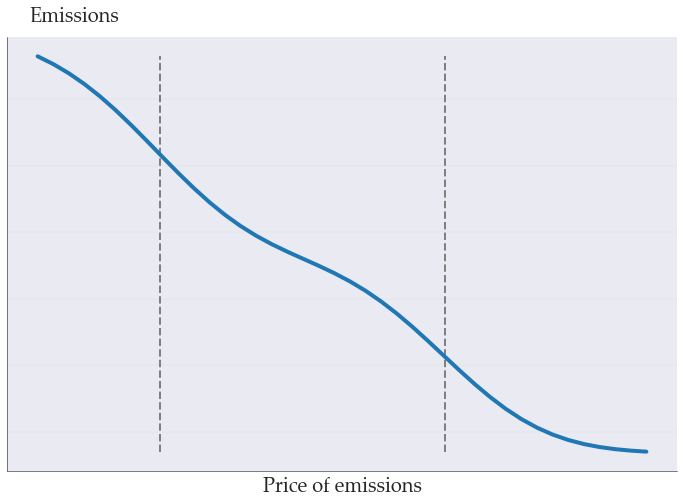

In [6]:
#Emission figure
#THIRD PLOT, OF EMISSIONS
fig = plt.figure(figsize=(12, 8))
fig.add_subplot(1, 1, 1)
ax = fig.get_axes()[0]
col = "M"
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #Otherwise throws warning simply because the column is named "M"
    ax.plot(df.index, col, color=colors[0], data=df, label=translate(col), linewidth=4)
ax.vlines(x=vlines, ymin=df[col].min(), ymax=df[col].max(), ls='--', color="grey", lw=2)
format_single_axis(ax, x_label=translate(df.index.name), y_label=translate(col))
fig.savefig("Emissions_" + catalog + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')

In [7]:
del fig, ax

In [8]:
#Fra da der skulle laves 2 oven i hinanden
# ax2 = ax.twinx()
# ax2.plot(df.index, col, data=dfID, label=translate(col) + ", ID", linewidth=4, color="#ff770e")

df.columns

Index(['M', 'M0', 'PwThat_EOP_t1', 'PwThat_EOP_t2', 'PwThat_basetech_EL_oil',
       'PwThat_basetech_EL_electricity', 'qD_EOP_t1', 'qD_EOP_t2',
       'qD_basetech_EL_oil', 'qD_basetech_EL_electricity'],
      dtype='object')

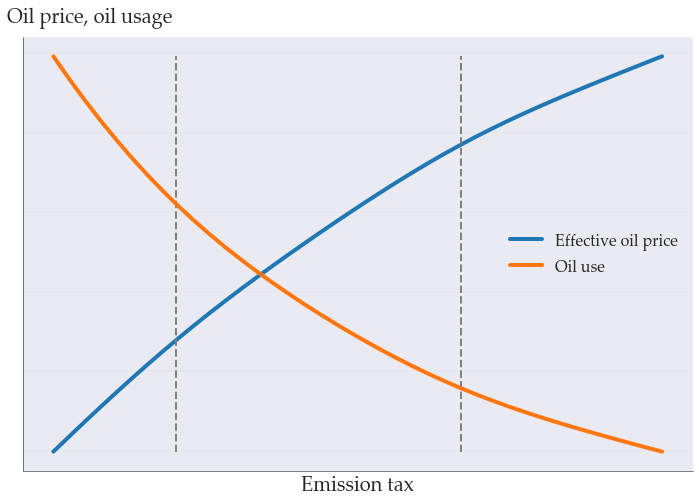

In [9]:
#Figure with oil price and oil usage
fig = plt.figure(figsize=(12, 8))
fig.add_subplot(1, 1, 1)
ax = fig.get_axes()[0]
col = "PwThat_basetech_EL_oil" 
ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[0])
ax2 = ax.twinx()
col = "qD_basetech_EL_oil"
ax2.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[1])
lines, labels = ax.get_legend_handles_labels()
lines = lines + ax2.get_legend_handles_labels()[0]
labels = labels + ax2.get_legend_handles_labels()[1]
ax.legend(lines, labels, fontsize=16, loc="right")
ax2.vlines(x=vlines, ymin=df[col].min(), ymax=df[col].max(), ls='--', color="grey", lw=2)
format_double_axes(ax, ax2, "Emission tax", "Oil price, oil usage")
fig.savefig("oil_" + catalog + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
del fig, ax, ax2

Figure number 3, electricity

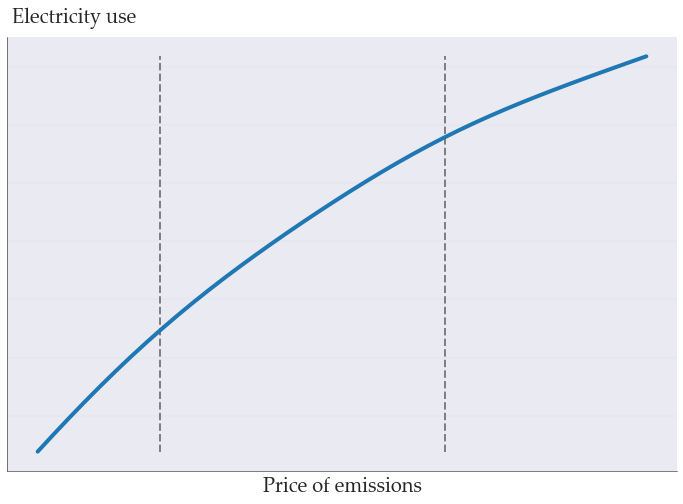

In [10]:
fig = plt.figure(figsize=(12, 8))
fig.add_subplot(1, 1, 1)
ax = fig.get_axes()[0]
col = "qD_basetech_EL_electricity"
ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[0])
ax.vlines(x=vlines, ymin=df[col].min(), ymax=df[col].max(), ls='--', color="grey", lw=2)
format_single_axis(ax, x_label=translate(df.index.name), y_label=translate(col))
fig.savefig("electricity_" + catalog + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
del fig, ax
#Da der var 2 serier:
# ax.plot(df.index, col, data=df, label=translate(col) + ", EOP", linewidth=4, color="#1f77b4")
# ax2 = ax.twinx()
# ax2.plot(dfID.index, col, data=dfID, label=translate(col) + ", ID", linewidth=4, color="#ff770e")
# ax.vlines(x=[6.5, 10], ymin=dfEOP[col].min(), ymax=dfEOP[col].max(), ls='--', color="grey", lw=2)
# lines, labels = ax.get_legend_handles_labels()
# lines = lines + ax2.get_legend_handles_labels()[0]
# labels = labels + ax2.get_legend_handles_labels()[1]
# ax.legend(lines, labels, fontsize=16, loc="right")
# format_double_axes(ax, ax2, x_label=translate(df.index.name), y_label=translate(col))